In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
df1 = pd.read_csv("api_data_aadhar_enrolment_0_500000.csv")
df2 = pd.read_csv("api_data_aadhar_enrolment_500000_1000000.csv")
df3 = pd.read_csv("api_data_aadhar_enrolment_1000000_1006029.csv")

print(df1.shape, df2.shape, df3.shape)


(500000, 7) (500000, 7) (6029, 7)


In [4]:
df = pd.concat([df1, df2, df3], ignore_index=True)
print(df.shape)


(1006029, 7)


In [5]:
df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [7]:
df.describe()


,pincode,age_0_5,age_5_17,age_18_greater
count,1.006029e+06,1.006029e+06,1.006029e+06,1.006029e+06
mean,5.186415e+05,3.525709e+00,1.710074e+00,1.673441e-01
std,2.056360e+05,1.753851e+01,1.436963e+01,3.220525e+00
min,1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.636410e+05,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.174170e+05,2.000000e+00,0.000000e+00,0.000000e+00
75%,7.001040e+05,3.000000e+00,1.000000e+00,0.000000e+00
max,8.554560e+05,2.688000e+03,1.812000e+03,8.550000e+02


In [10]:
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")
df.fillna(0, inplace=True)

df["pincode"] = df["pincode"].astype(int)
df["age_0_5"] = df["age_0_5"].astype(int)
df["age_5_17"] = df["age_5_17"].astype(int)
df["age_18_greater"] = df["age_18_greater"].astype(int)


In [11]:
df["total_enrolment"] = (
    df["age_0_5"] + df["age_5_17"] + df["age_18_greater"]
)


In [12]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month


In [13]:
state_trend = df.groupby("state")["total_enrolment"].sum().sort_values(ascending=False)

state_trend.head(10)


state
Uttar Pradesh     1018629
Bihar              609585
Madhya Pradesh     493970
West Bengal        375297
Maharashtra        369139
Rajasthan          348458
Gujarat            280549
Assam              230197
Karnataka          223235
Tamil Nadu         220789
Name: total_enrolment, dtype: int32

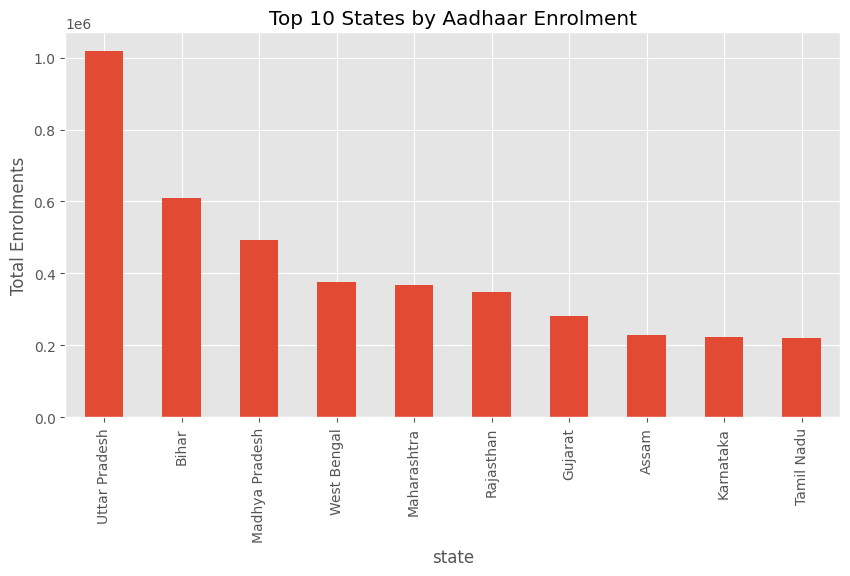

In [14]:
state_trend.head(10).plot(kind="bar", figsize=(10,5))
plt.title("Top 10 States by Aadhaar Enrolment")
plt.ylabel("Total Enrolments")
plt.show()


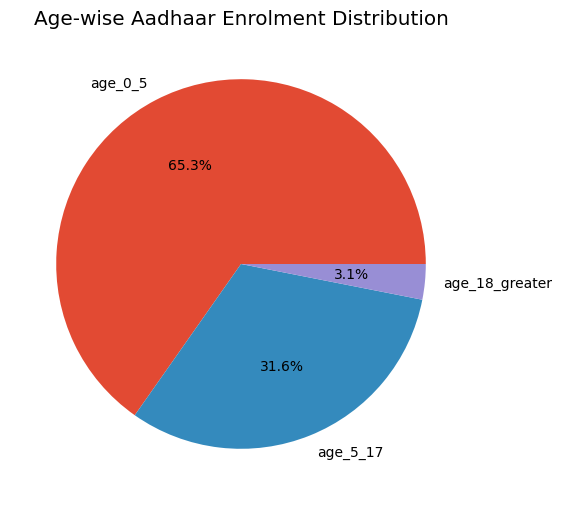

In [15]:
age_data = df[["age_0_5", "age_5_17", "age_18_greater"]].sum()

age_data.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Age-wise Aadhaar Enrolment Distribution")
plt.ylabel("")
plt.show()


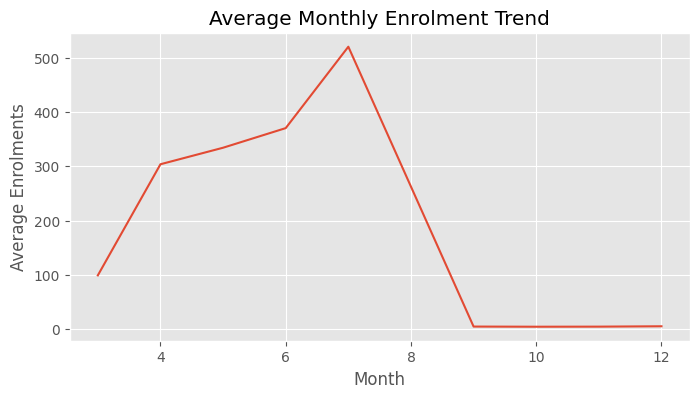

In [16]:
monthly_trend = df.groupby("month")["total_enrolment"].mean()

monthly_trend.plot(figsize=(8,4))
plt.title("Average Monthly Enrolment Trend")
plt.xlabel("Month")
plt.ylabel("Average Enrolments")
plt.show()


In [17]:
district_avg = df.groupby("district")["total_enrolment"].mean()
df["district_avg"] = df["district"].map(district_avg)

df["anomaly_flag"] = df["total_enrolment"] > (3 * df["district_avg"])


In [18]:
anomalies = df[df["anomaly_flag"] == True]
anomalies.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment,year,month,district_avg,anomaly_flag
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109,2025,3,21.630631,True
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123,2025,3,9.499423,True
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106,2025,3,12.745499,True
5,2025-03-09,Bihar,Sitamarhi,843331,20,49,12,81,2025,3,25.258373,True
6,2025-03-09,Bihar,Sitamarhi,843330,23,24,42,89,2025,3,25.258373,True


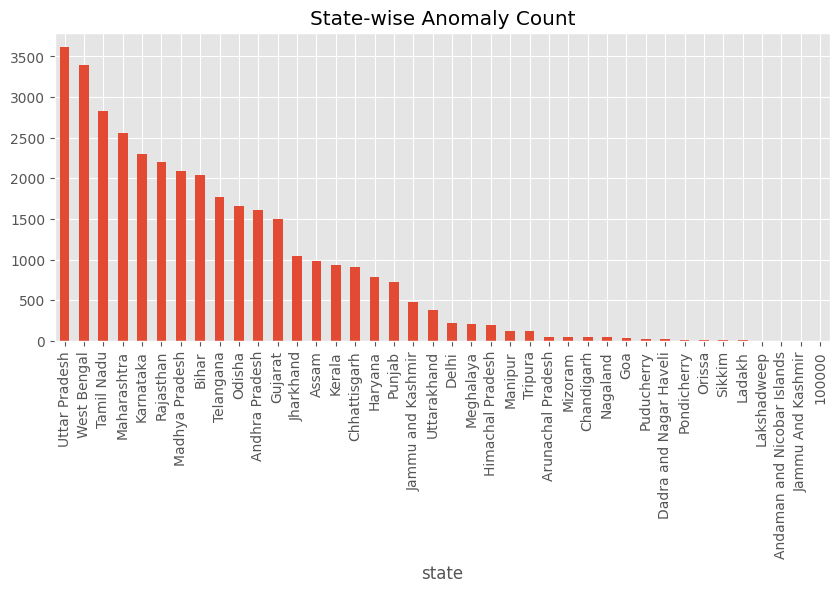

In [19]:
anomaly_state = anomalies.groupby("state").size().sort_values(ascending=False)

anomaly_state.plot(kind="bar", figsize=(10,4))
plt.title("State-wise Anomaly Count")
plt.show()


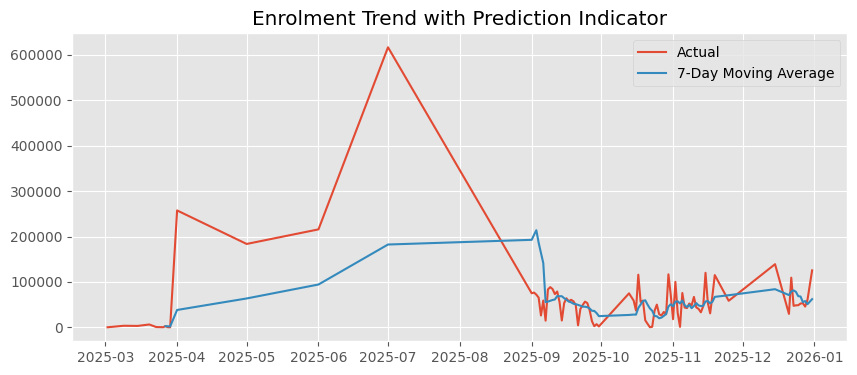

In [20]:
df_sorted = df.sort_values("date")

daily_trend = df_sorted.groupby("date")["total_enrolment"].sum()
rolling_avg = daily_trend.rolling(window=7).mean()

plt.figure(figsize=(10,4))
plt.plot(daily_trend, label="Actual")
plt.plot(rolling_avg, label="7-Day Moving Average")
plt.legend()
plt.title("Enrolment Trend with Prediction Indicator")
plt.show()


In [21]:
low_enrolment = df.groupby("district")["total_enrolment"].sum().sort_values().head(10)
low_enrolment


district
KOLKATA         1
Hooghiy         1
Nicobars        1
Hingoli *       1
Jhajjar *       1
Bagpat          1
Namakkal   *    1
Tiruvarur       1
Salumbar        1
Balotra         1
Name: total_enrolment, dtype: int32

Advance Analysis

In [22]:
from scipy.stats import zscore

df["z_score"] = zscore(df["total_enrolment"])
df["anomaly_z"] = df["z_score"].abs() > 3

df[df["anomaly_z"]].head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment,year,month,district_avg,anomaly_flag,z_score,anomaly_z
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109,2025,3,21.630631,True,3.280174,True
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123,2025,3,9.499423,True,3.723454,True
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106,2025,3,12.745499,True,3.185186,True
10,2025-03-09,Uttar Pradesh,Maharajganj,273164,31,70,13,114,2025,3,16.085509,True,3.438489,True
11,2025-03-09,Bihar,Sitamarhi,843317,35,94,16,145,2025,3,25.258373,True,4.420038,True


In [23]:
Q1 = df["total_enrolment"].quantile(0.25)
Q3 = df["total_enrolment"].quantile(0.75)
IQR = Q3 - Q1

df["anomaly_iqr"] = (
    (df["total_enrolment"] < (Q1 - 1.5 * IQR)) |
    (df["total_enrolment"] > (Q3 + 1.5 * IQR))
)

df[df["anomaly_iqr"]].head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment,year,month,district_avg,anomaly_flag,z_score,anomaly_z,anomaly_iqr
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109,2025,3,21.630631,True,3.280174,True,True
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86,2025,3,237.876289,False,2.551928,False,True
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123,2025,3,9.499423,True,3.723454,True,True
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106,2025,3,12.745499,True,3.185186,True,True
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51,2025,3,237.876289,False,1.443728,False,True


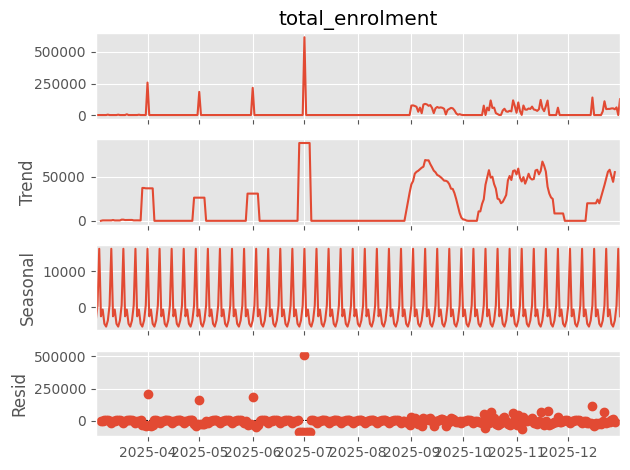

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

daily_series = (
    df.groupby("date")["total_enrolment"]
    .sum()
    .asfreq("D")
    .fillna(0)
)

decomposition = seasonal_decompose(daily_series, model="additive")

decomposition.plot();


In [26]:
district_stats = df.groupby("district").agg(
    avg_enrolment=("total_enrolment", "mean"),
    std_enrolment=("total_enrolment", "std"),
    anomaly_count=("anomaly_z", "sum")
).reset_index()

district_stats["risk_score"] = (
    district_stats["std_enrolment"] * 0.4 +
    district_stats["anomaly_count"] * 0.6
)

district_stats.sort_values("risk_score", ascending=False).head(10)


,district,avg_enrolment,std_enrolment,anomaly_count,risk_score
246,Dinajpur Uttar,1061.000000,850.600611,10,346.240245
662,Nuh,753.000000,461.033621,2,185.613449
961,West Khasi Hills,103.908497,398.842393,13,167.336957
685,Pashchim Champaran,201.962963,377.263914,22,164.105566
812,Shravasti,633.750000,403.541303,4,163.816521
195,Coochbehar,441.000000,389.449184,9,161.179673
713,Purbi Champaran,619.625000,338.834551,23,149.333821
324,Gurugram,376.571429,334.537420,6,137.414968
270,East Singhbum,361.750000,290.573427,4,118.629371
574,Medinipur West,322.500000,283.549819,2,114.619928


In [28]:
district_stats = district_stats.fillna(0)


In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = district_stats[["avg_enrolment", "std_enrolment", "anomaly_count"]]
scaled = StandardScaler().fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
district_stats["cluster"] = kmeans.fit_predict(scaled)

district_stats.head()


,district,avg_enrolment,std_enrolment,anomaly_count,risk_score,cluster
0,100000,9.909091,33.791953,1,14.116781,0
1,24 Paraganas North,198.290323,244.738390,22,111.095356,1
2,24 Paraganas South,490.000000,0.000000,1,0.000000,1
3,ANGUL,1.000000,0.000000,0,0.000000,0
4,ANUGUL,1.181818,0.404520,0,0.161808,0


<Axes: xlabel='avg_enrolment', ylabel='std_enrolment'>

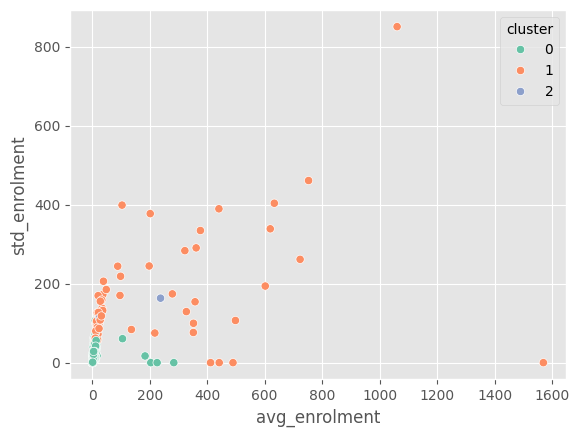

In [30]:
import seaborn as sns

sns.scatterplot(
    data=district_stats,
    x="avg_enrolment",
    y="std_enrolment",
    hue="cluster",
    palette="Set2"
)


In [31]:
df_sorted = df.sort_values("date")

df_sorted["rolling_14"] = (
    df_sorted.groupby("district")["total_enrolment"]
    .rolling(14)
    .mean()
    .reset_index(level=0, drop=True)
)

df_sorted["momentum"] = df_sorted["total_enrolment"] - df_sorted["rolling_14"]

df_sorted.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment,year,month,district_avg,anomaly_flag,z_score,anomaly_z,anomaly_iqr,rolling_14,momentum
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109,2025,3,21.630631,True,3.280174,True,True,NaN,NaN
32,2025-03-09,West Bengal,Dinajpur Uttar,733129,26,18,27,71,2025,3,1061.000000,False,2.076985,False,True,NaN,NaN
31,2025-03-09,Uttar Pradesh,Lucknow,226003,23,102,17,142,2025,3,8.698943,True,4.325049,True,True,NaN,NaN
30,2025-03-09,West Bengal,Coochbehar,736135,19,12,19,50,2025,3,441.000000,False,1.412065,False,True,NaN,NaN
29,2025-03-09,Bihar,Purbi Champaran,845304,18,72,12,102,2025,3,619.625000,False,3.058534,True,True,NaN,NaN


In [32]:
hotspots = (
    df.groupby("district")["total_enrolment"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

hotspots


district
Thane                43688
Sitamarhi            42232
Bahraich             39338
Murshidabad          35911
South 24 Parganas    33540
Pune                 31763
Jaipur               31146
Bengaluru            30980
Sitapur              30854
Hyderabad            30830
West Champaran       30438
Agra                 29910
East Champaran       29323
Muzaffarpur          28855
East Khasi Hills     28812
Name: total_enrolment, dtype: int32

In [33]:
district_stats.to_csv("district_risk_analysis.csv", index=False)


In [ ]:
enrol_summary = df.groupby("district").agg(
    total_enrolment=("total_enrolment", "sum")
).reset_index()

enrol_summary.to_csv("enrol_summary.csv", index=False)


NameError: name 'enrol_df' is not defined